In [1]:
import qiskit
from qiskit import QuantumCircuit


In [2]:
# secretNumber = '10101010100'
secretNumber = '1000101'
circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber))

In [3]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

for index, one in enumerate(reversed(secretNumber)):
    print(f"index{index} is {one}")
    if one == "1":
        circuit.cx(index,len(secretNumber))

circuit.barrier()

circuit.h(range(len(secretNumber)))

circuit.barrier()

circuit.measure(range(len(secretNumber)),range(len(secretNumber)))

index0 is 1
index1 is 0
index2 is 1
index3 is 0
index4 is 0
index5 is 0
index6 is 1


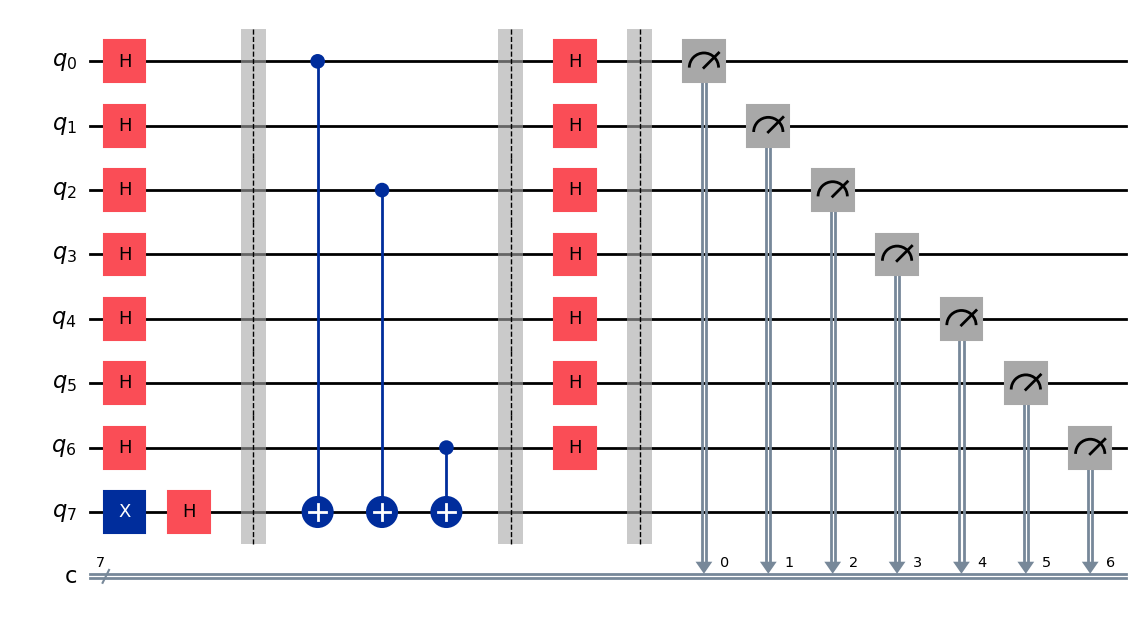

In [4]:
circuit.draw(output='mpl')

In [5]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
compiled_circuit = qiskit.transpile(circuit, simulator)
count = simulator.run(compiled_circuit,shots=1024).result().get_counts()
print(count)

{'1000101': 1024}


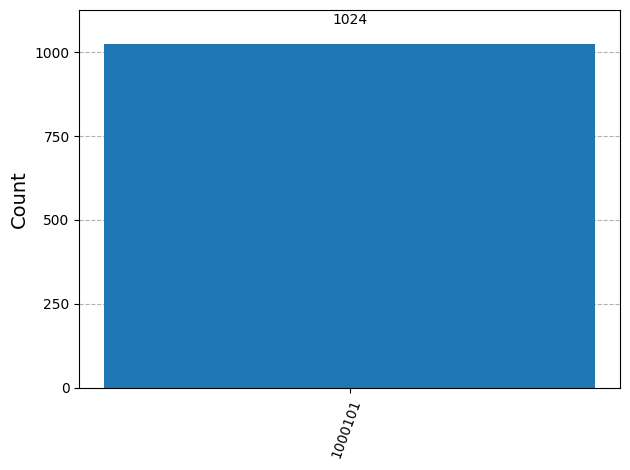

In [6]:
plot_histogram(count)